<a href="https://colab.research.google.com/github/moodlep/vae_playground/blob/main/colab_notebooks/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get fashion MNIST from PyTorch

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



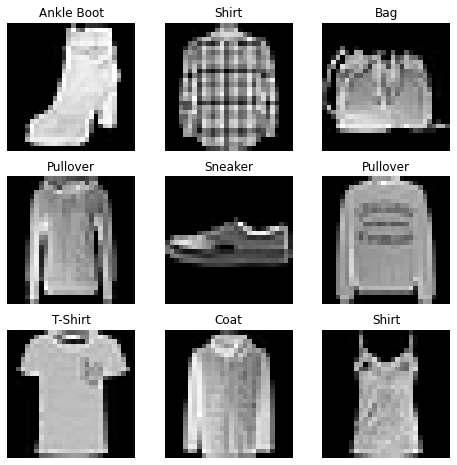

In [2]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [3]:
training_data[0][0].shape, training_data.data.shape

(torch.Size([1, 28, 28]), torch.Size([60000, 28, 28]))

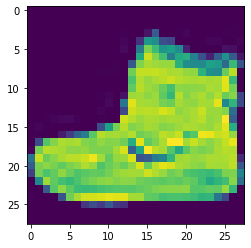

In [4]:
plt.imshow(training_data.data[0])
plt.show()

# AE code: 

Implement basic barebones autoencoder https://lilianweng.github.io/lil-log/2018/08/12/from-autoencoder-to-beta-vae.html

In [5]:
import torch.nn as nn

In [13]:
class Autoencoder(nn.Module):

  def __init__(self, dims, activation_fnc = nn.ReLU()):

    super(Autoencoder, self).__init__()
    # dims = [input_dim, hidden_dim, encoded_dim]

    # Encoder g(x) -> x_hat
    self.encoder = nn.Sequential(
        nn.Linear(dims[0], dims[1]),
        activation_fnc,
        nn.Linear(dims[1], dims[1]),
        activation_fnc,
        nn.Linear(dims[1], dims[2])
    )

    self.decoder = nn.Sequential(
        nn.Linear(dims[2], dims[1]),
        activation_fnc,
        nn.Linear(dims[1], dims[1]),
        activation_fnc,
        nn.Linear(dims[1], dims[0])
    )

  def forward(self, input):
    x_hat = self.encoder(input)
    x = self.decoder(x_hat)

    return x

In [14]:
def eval():
  # Lazy eval: let's see how the first test image progresses
  with torch.no_grad():
    output = ae(test_data.data[0].view(-1).unsqueeze(0).float())
    plt.imshow(output.reshape(28,28))
    plt.show()  

In [15]:
config = {
    'epochs': 10,
    'eval_progression': True, # call eval during training
    'eval_steps': 100,
    'eval_epoch': False  # call eval after each epoch
}

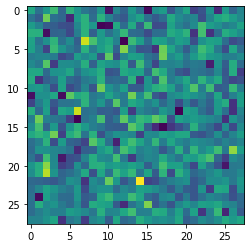

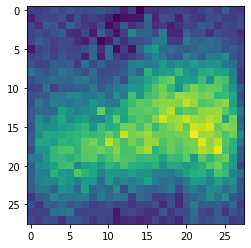

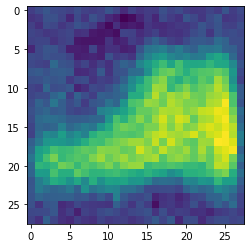

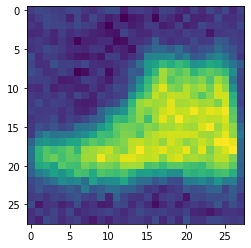

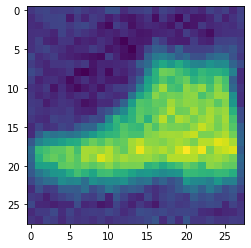

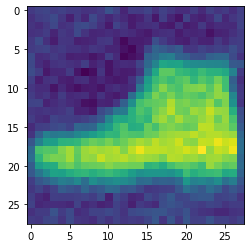

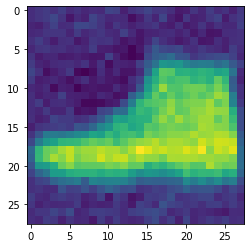

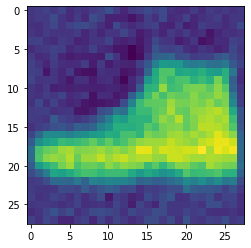

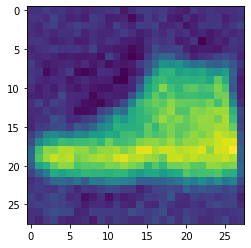

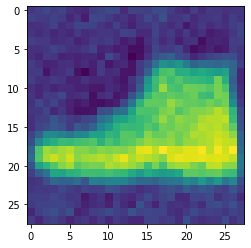

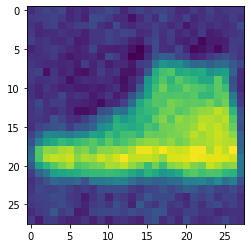

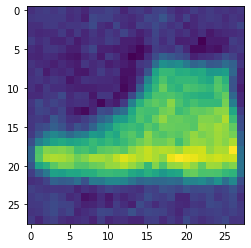

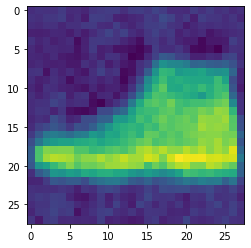

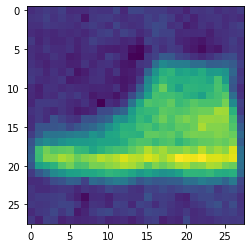

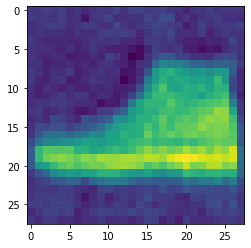

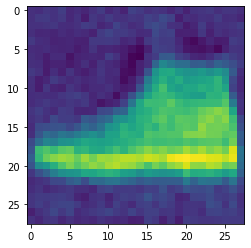

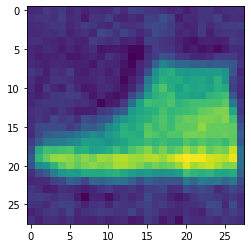

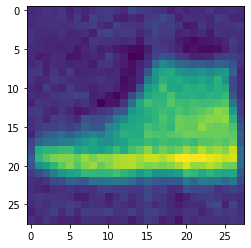

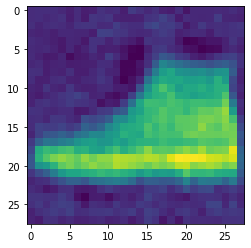

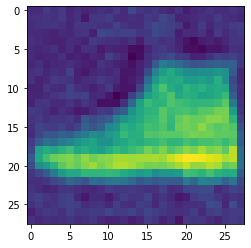

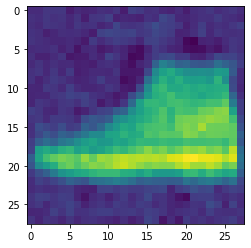

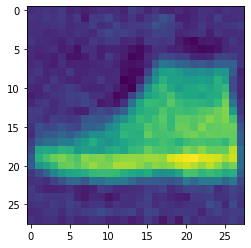

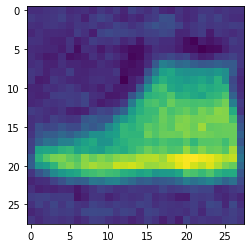

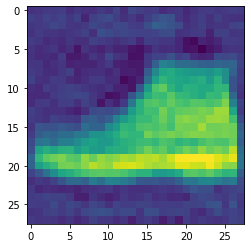

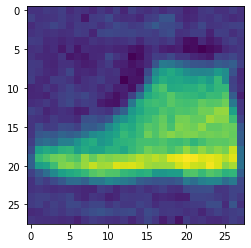

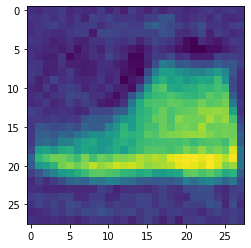

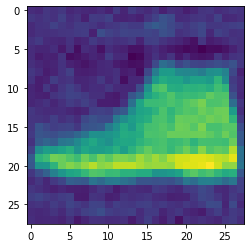

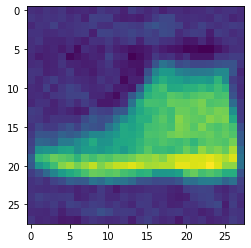

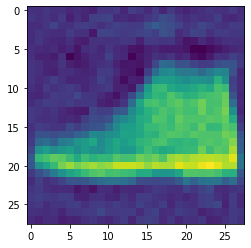

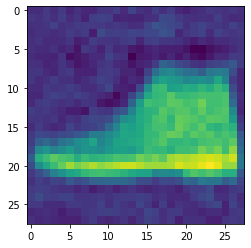

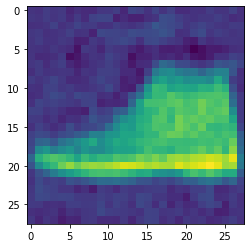

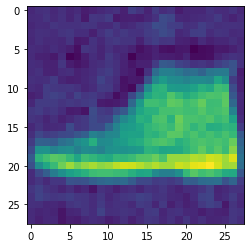

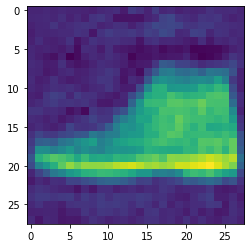

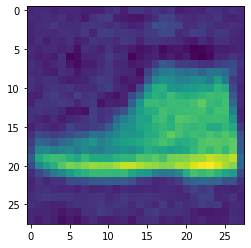

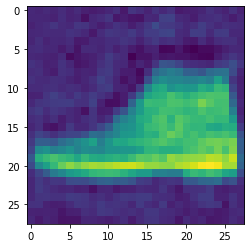

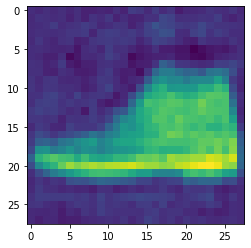

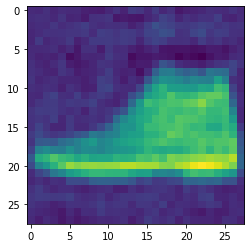

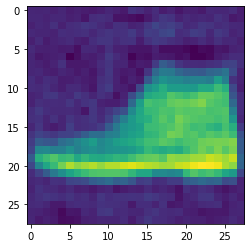

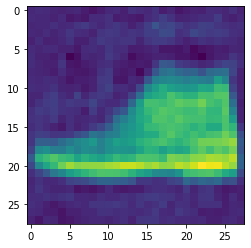

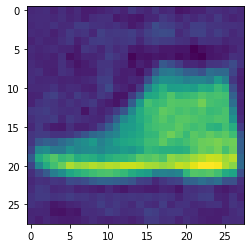

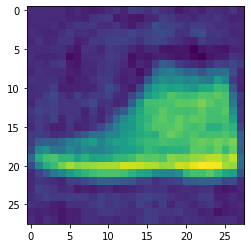

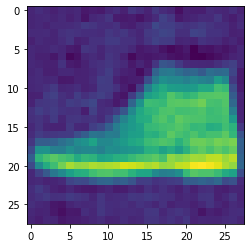

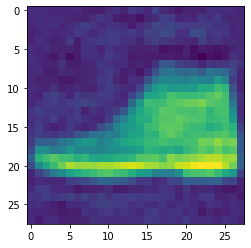

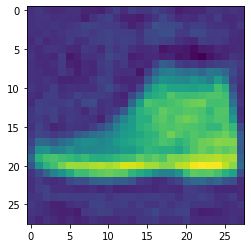

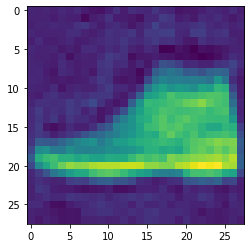

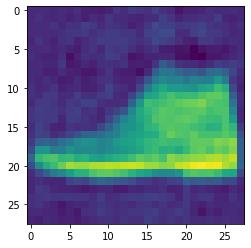

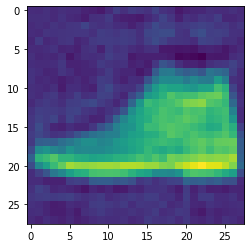

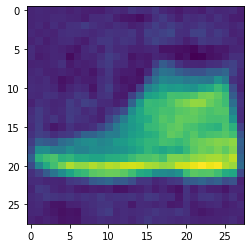

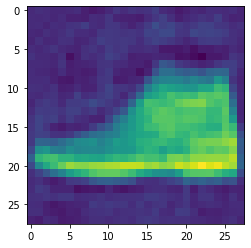

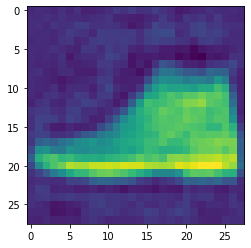

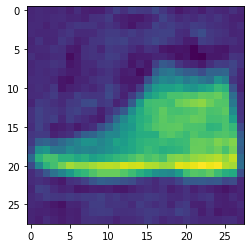

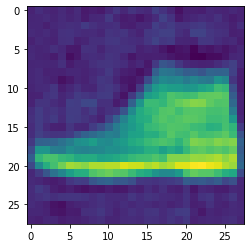

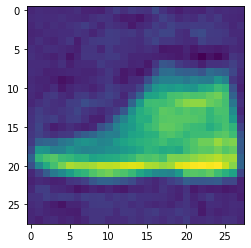

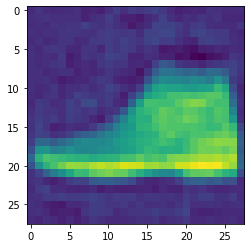

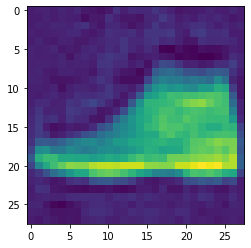

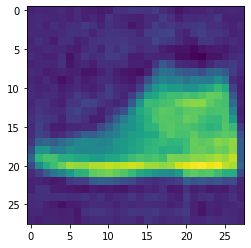

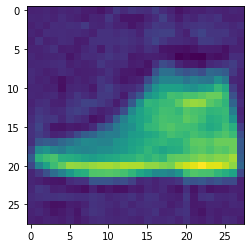

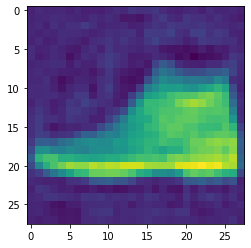

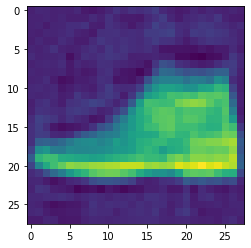

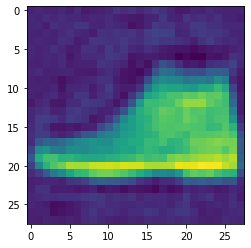

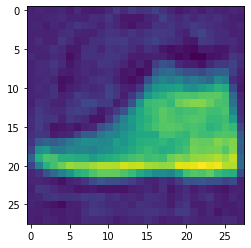

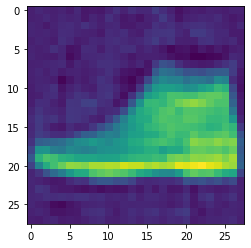

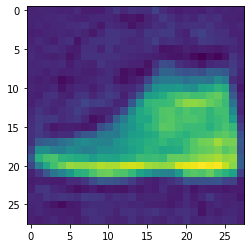

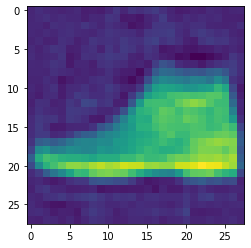

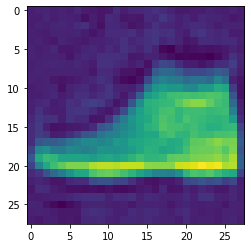

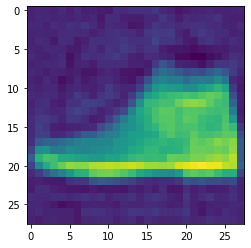

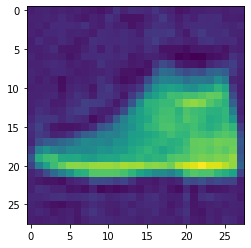

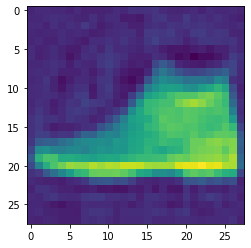

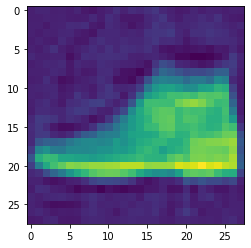

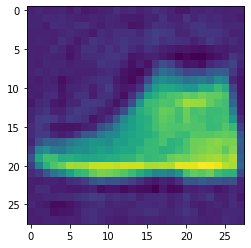

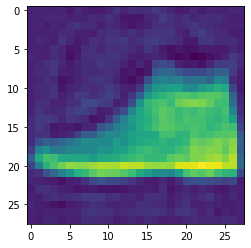

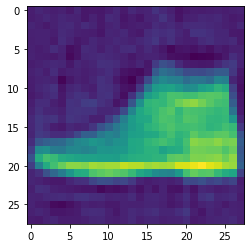

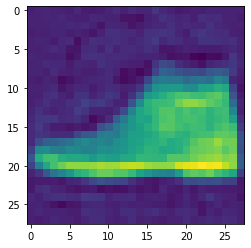

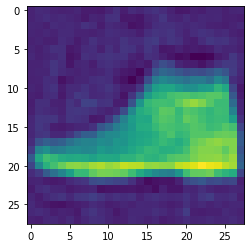

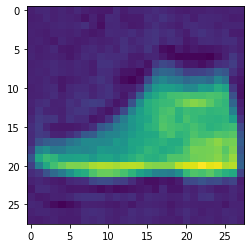

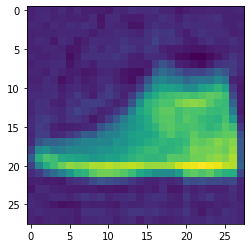

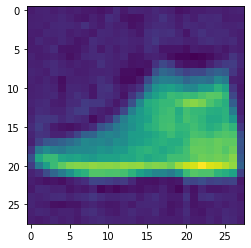

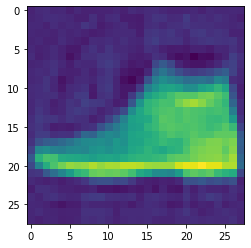

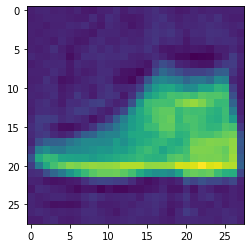

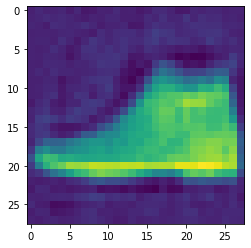

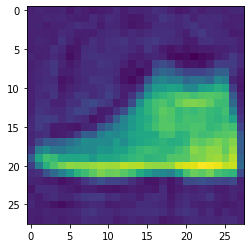

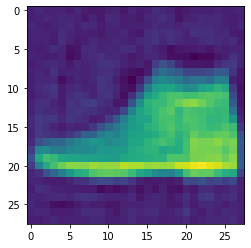

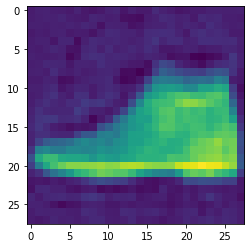

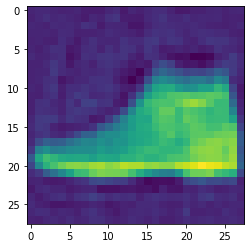

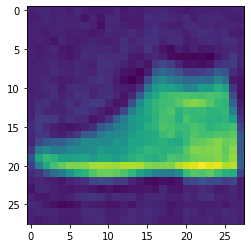

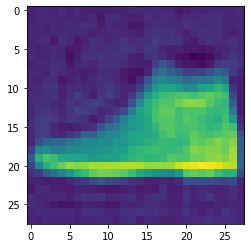

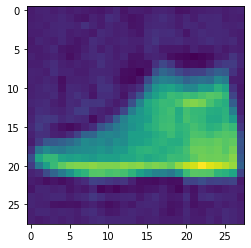

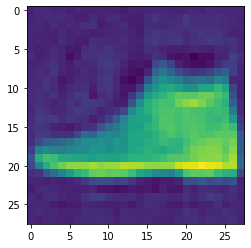

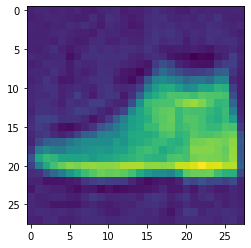

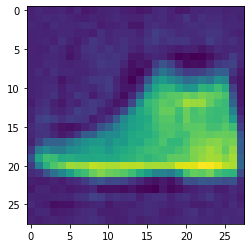

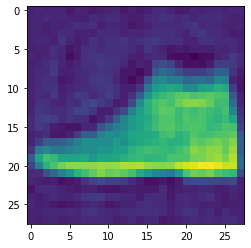

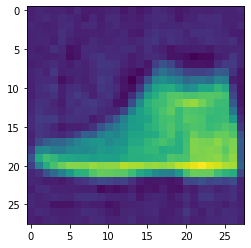

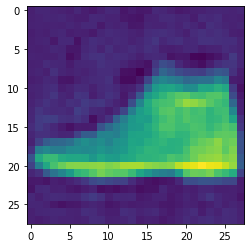

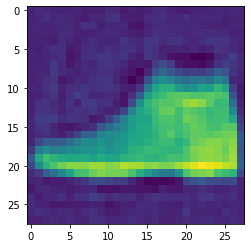

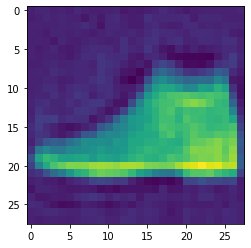

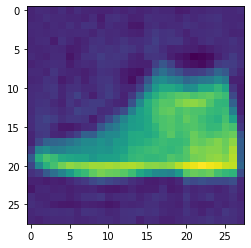

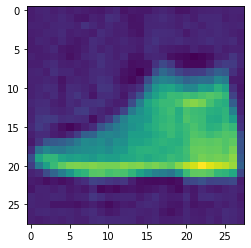

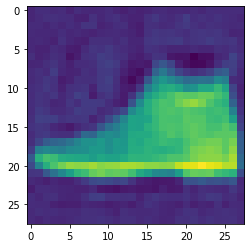

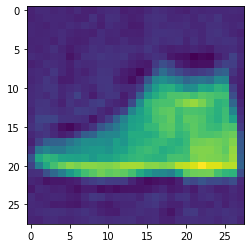

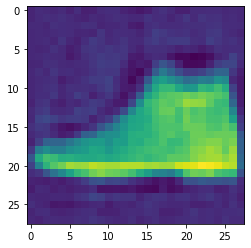

In [16]:
bs = 64 # batch size
ae = Autoencoder([784, 256, 32])

optimiser = torch.optim.Adam(ae.parameters(), lr=2.5e-4)
losses = []
for epoch in range(config['epochs']):

  # Sample batches in loop
  for i, batch in enumerate(iter(train_dataloader)):
    images = batch[0].view(batch[0].shape[0], -1)

    # forward pass
    predictions = ae(images)

    loss = ((images-predictions)**2).sum(-1).mean()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    # print(epoch, loss.item())
    losses.append(loss.item())

    if config['eval_progression']:
      if i % config['eval_steps'] == 0:
        eval()

  if config['eval_epoch']:
    eval()


In [10]:
test_data.data[0].shape, test_data.data[0].view(-1).unsqueeze(0).shape

(torch.Size([28, 28]), torch.Size([1, 784]))

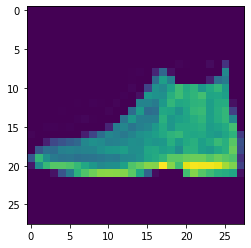

In [11]:
plt.imshow(test_data.data[0])
plt.show()